In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
# epochs_breathing_amplitude = loading_from_listfolder(folder_selected,'epochs_resp_amplitude')
epochs_breathing_phase = loading_from_listfolder(folder_selected,'epochs_resp_phase')

folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

In [3]:
epochs_concat = []
for iEpoch,theseEpochs in enumerate(epochs_breathing_phase):
    b = "Subject: " + str(iEpoch) + '/'+ str(len(epochs_breathing_phase)-1)
    print (b, end="\r")
    theseEpochs = theseEpochs.pick_channels(["AUX3filter"])
    epochs_concat.append(theseEpochs)
epochs_concat = mne.concatenate_epochs(epochs_concat)
print('Concantenated Epochs')

Concantenated Epochs


In [8]:
from scipy import stats

listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

index1 = np.where(epochs_breathing_phase[0].times == 1)[0][0]
index2 = np.where(epochs_breathing_phase[0].times == 3)[0][0]
degrees_mean_dict = dict()    
for iEvent,event_type in enumerate(listEventOfInterest_start):
    degrees_mean = []
    print(event_type)
    for iEpoch,theseEpochs in enumerate(epochs_breathing_phase):
        picks_resp= theseEpochs.ch_names.index("AUX3filter")
        b = "Subject: " + str(iEpoch) + '/'+ str(len(epochs_breathing_phase)-1)
        print (b, end="\r")
        
        data_phase = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp)).real
        radians = data_phase[:,index1:index2]+np.pi
        degrees = np.rad2deg(radians) 
        print(np.shape(degrees))
        degrees_mean.append(np.mean(np.reshape(degrees,-1),axis=0))
    degrees_mean_dict.update({event_type:np.asarray(degrees_mean)})

for iEvent,event_type in enumerate(listEventOfInterest_start):
    mu = np.mean(degrees_mean_dict[event_type])
    dev = np.std(degrees_mean_dict[event_type])
    print(event_type,mu,dev)

stats.ttest_ind(degrees_mean_dict['CUE_START_INHALE'],degrees_mean_dict['CUE_START_EXHALE'])

CUE_START_INHALE
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)0/33
(30, 1024)1/33
(30, 1024)2/33
(30, 1024)3/33
(30, 1024)4/33
(30, 1024)5/33
(30, 1024)6/33
(30, 1024)7/33
(30, 1024)8/33
(30, 1024)9/33
(30, 1024)0/33
(30, 1024)1/33
(30, 1024)2/33
(30, 1024)3/33
(30, 1024)4/33
(30, 1024)5/33
(30, 1024)6/33
(30, 1024)7/33
(30, 1024)8/33
(30, 1024)9/33
(30, 1024)0/33
(30, 1024)1/33
(30, 1024)2/33
(30, 1024)3/33
CUE_START_EXHALE
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)/33
(30, 1024)0/33
(30, 1024)1/33
(30, 1024)2/33
(30, 1024)3/33
(30, 1024)4/33
(30, 1024)5/33
(30, 1024)6/33
(30, 1024)7/33
(30, 1024)8/33
(30, 1024)9/33
(30, 1024)0/33
(30, 1024)1/33
(30, 1024)2/33
(30, 1024)3/33
(30, 1024)4/33
(30, 1024)5/33
(30, 1024)6/33
(30, 1024)7/33
(30, 1024)8/33
(30, 1024)9/33
(30, 1024)0/33
(30, 1024)1

Ttest_indResult(statistic=9.098665547267938, pvalue=2.9060310401558046e-13)

1536 2560
CUE_START_INHALE
CUE_START_EXHALE


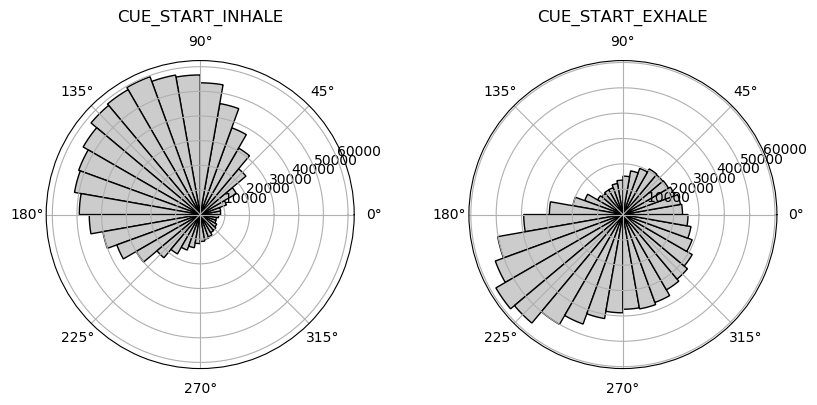

In [12]:
listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

colormap = [[0.9706,0.4902,0],[0,0.4471,0.7412]];

index1 = np.where(epochs_breathing_phase[0].times == 1)[0][0]
index2 = np.where(epochs_breathing_phase[0].times == 3)[0][0]
print(index1,index2)

fig = plt.figure(figsize=(10, 4))
plt.style.use('default')
bin_size = 10
picks_resp=epochs_concat[0].ch_names.index("AUX3filter")
for iEvent,event_type in enumerate(listEventOfInterest_start):
    print(event_type)
    ax = fig.add_subplot(121+iEvent, projection='polar')
    ax.set_theta_zero_location("E")
    ax.set_title(event_type, y=1.1)
    data_phase = np.squeeze(epochs_concat[event_type].get_data(picks=picks_resp)).real
    radians = data_phase[:,index1:index2]
    degrees = np.rad2deg(radians) 
    a , b=np.histogram(degrees, bins=np.arange(-180, 180+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=[0.8,0.8,0.8], edgecolor='k',label=event_type)
path = os.path.join(folderGA,'Respiration_data')
saving_figure('check_samples_phase',path,fig)

1536 2560
CUE_START_INHALE
41.17585794047726 115.00629958824
CUE_START_EXHALE
-44.1925835278986 99.84409455804766


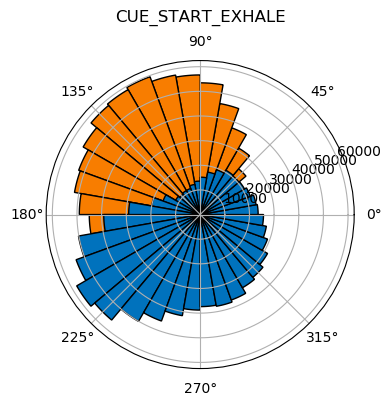

In [17]:
listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

colormap = [[0.9706,0.4902,0],[0,0.4471,0.7412]];

index1 = np.where(epochs_breathing_phase[0].times == 1)[0][0]
index2 = np.where(epochs_breathing_phase[0].times == 3)[0][0]
print(index1,index2)

fig = plt.figure(figsize=(10, 4))
plt.style.use('default')
bin_size = 10
picks_resp=epochs_concat[0].ch_names.index("AUX3filter")
degrees_dict = dict()
for iEvent,event_type in enumerate(listEventOfInterest_start):
    print(event_type)
    ax = fig.add_subplot(121, projection='polar')
    ax.set_theta_zero_location("E")
    ax.set_title(event_type, y=1.1)
    data_phase = np.squeeze(epochs_concat[event_type].get_data(picks=picks_resp)).real
    radians = data_phase[:,index1:index2]
    degrees = np.rad2deg(radians) 
    degrees_dict.update({event_type:degrees})    
    print(mu,dev)
    a , b=np.histogram(degrees, bins=np.arange(-180, 180+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=colormap[iEvent], edgecolor='k',label=event_type)
path = os.path.join(folderGA,'Respiration_data')
saving_figure('check_samples_phase2',path,fig)